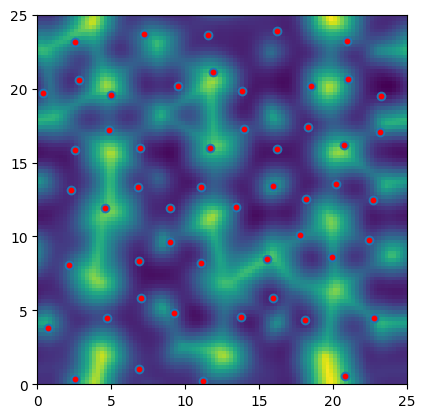

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ase import io

from src.utils import vec2box, box2vec

path = "/mnt/e/simu_data/bulk-Hup-Data/20240923-bulk-Hup-test/afm/icehupT160_2000000_0_12_0/0.png"
struct = "/mnt/e/simu_data/bulk-Hup-Data/20240923-bulk-Hup-test/label/icehupT160_2000000_0_12_0.poscar"
from PIL import Image

img = np.array(Image.open(path).convert('L'))
img = np.rot90(img, k=-1)
# img = img.transpose(method=Image.Transpose.FLIP_LEFT_RIGHT)

AT = io.read(struct)

cell = AT.cell.array

X = AT.cell.array[0,0]
Y = AT.cell.array[1,1]

AT = AT[AT.numbers == 8].positions

box = vec2box(AT @ np.linalg.inv(cell), box_size=(100, 100, 1))
conf, rs, *_ = box2vec(box[...,0], box[..., 1:4])
rs = rs @ cell
plt.scatter(rs[...,0], rs[...,1])
plt.scatter(AT[:, 0], AT[:, 1], c='r', s=10)
plt.imshow(box[:,:,0,0] + img, extent=[0, X, 0, Y]) # Y, X


tensor([[0.3495, 0.3657, 0.2993,  ..., 0.3078, 0.2166, 0.2417],
        [0.3226, 0.2827, 0.2991,  ..., 0.3769, 0.2458, 0.3187],
        [0.4116, 0.3157, 0.3094,  ..., 0.3002, 0.2530, 0.2960],
        ...,
        [0.2927, 0.2653, 0.2864,  ..., 0.2926, 0.2661, 0.3610],
        [0.2975, 0.3475, 0.3457,  ..., 0.3087, 0.3313, 0.3064],
        [0.2188, 0.3229, 0.3078,  ..., 0.2887, 0.2775, 0.3325]])


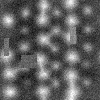

In [5]:
from configs.detect import DetectConfig
from src.dataset import DetectDataset
cfg = DetectConfig()

train_dts = DetectDataset(cfg.dataset.train_path,
                                       mode='afm+label',
                                       num_images=cfg.dataset.num_images,
                                       image_size=cfg.dataset.image_size,
                                       image_split=cfg.dataset.image_split,
                                       real_size=cfg.dataset.real_size,
                                       box_size=(32, 32, 4),
                                       random_transform=True,
                                       random_noisy=0.1,
                                       random_cutout=True,
                                       random_jitter=True,
                                       random_blur=True,
                                       random_shift=True,
                                       random_flipx=False,
                                       random_flipy=False)

name, afm, grid, atoms = train_dts[0]
import numpy as np
from PIL import Image

print(afm[0,0])
img = Image.fromarray((afm[0,0].numpy() * 255).astype(np.int8))
img.show()